**Bryan Smith**

I have embarked on a project involving the DBLP Publication Network, which is represented as a bipartite graph. In this graph, the nodes consist of authors and academic papers. Each edge $(a, p)$ signifies a connection between an author $a$ and a paper $p$.

Some initial questions to answer:

- What is the minimum, maximum, and average, and standard deviation of the number of authors per paper?
- What is the minimum, maximum, and average, and standard deviation of the number of papers per author?
- How many connected components are there in the network?
- Pick some three metrics on graphs, evaluate them for this graph, and interpret their meanings.


In [1]:
import networkx as nx
import numpy as np
G = nx.Graph()

# Go through file and populate the nodes and edges and differientiate authors from their academic papers
with open('out.dblp-author-all.txt', 'r') as file:
    for line in file:
        author, paper = map(int, line.split())
        G.add_edge(f'author_{author}', f'paper_{paper}')

# Get min, max, stdev number of authors per paper and papers per author by keeping track of number of authors per paper and papers per authors
authorsPerPaper = {paper: G.degree(paper) for paper in G.nodes if paper.startswith('paper_')}
papersPerAuthor = {author: G.degree(author) for author in G.nodes if author.startswith('author_')}
print(f'The most authors on a single paper is {max(authorsPerPaper.values())}')
print(f'The least amount of authors on a single paper is {min(authorsPerPaper.values())}')
print(f'The std deviation of authors on a single paper is {np.std(list(authorsPerPaper.values()), ddof=1)}')
print(f'The most papers written by a single author is {max(papersPerAuthor.values())}')
print(f'The least amount of papers written by a single author is {min(papersPerAuthor.values())}')
print(f'The std deviation of papers for an author to write is {np.std(list(papersPerAuthor.values()), ddof=1)}')

# Find the number of connected components of the network
print(f'The number of connected components of the network is {len(list(nx.connected_components(G)))}')

# Pick three metrics on graphs, evaluate them for this graph, and interprete their meanings. 

# For the first one I will choose the clustering coefficient, which will tell us the tendency of authors to collaborate on the same papers. There are too many nodes to list, so I need to summarize them.
coefficient = nx.bipartite.clustering(G, nodes=papersPerAuthor.keys())
coefficients = list(coefficient.values())
print(f'Mean clustering coefficient: {np.mean(coefficients)}')
print(f'Median clustering coefficient: {np.median(coefficients)}')
print(f'Std deviation of clustering coefficients: {np.std(coefficients, ddof=1)}')

# For the next one, I will choose pagerank. This tells us which authors are the most influential given a pagerank score.
pagerank = nx.pagerank(G)
authorPageRank = {node: score for node, score in pagerank.items() if node.startswith('author_')}
pagerankValues = list(authorPageRank.values())
print(f'Mean PageRank for authors: {np.mean(pagerankValues)}')
print(f'Median PageRank for authors: {np.median(pagerankValues)}')
print(f'Std deviation for authors: {np.std(pagerankValues, ddof=1)}')

# For the last one, I will choose projected graph and calculate the degree centrality. This will give us a graph where nodes are papers and edges are shared if the two papers share at least one author. We can analyze how many authors collaborated with each other.
# This last one takes a while!
projected_G = nx.bipartite.projected_graph(G, authorsPerPaper.keys())
# Calculate degree centrality for the projected graph
degree_centrality = nx.degree_centrality(projected_G)
# Get the top 10 most collaborated papers based on degree centrality
top_10_papers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 most collaborated papers based on degree centrality:")
for paper, centrality in top_10_papers:
    print(f'Paper {paper} with degree centrality {centrality}')

The most authors on a single paper is 119
The least amount of authors on a single paper is 1
The std deviation of authors on a single paper is 1.5774377226087826
The most papers written by a single author is 951
The least amount of papers written by a single author is 1
The std deviation of papers for an author to write is 14.632955654262846
The number of connected components of the network is 117547
Mean clustering coefficient: 0.14324445095932758
Median clustering coefficient: 0.125
Std deviation of clustering coefficients: 0.10088898952853999
Mean PageRank for authors: 4.6714175075748286e-07
Median PageRank for authors: 2.6262619188520085e-07
Std deviation for authors: 8.578720469183046e-07
Top 10 most collaborated papers based on degree centrality:
Paper paper_3127409 with degree centrality 0.001287702033099267
Paper paper_3335204 with degree centrality 0.001287702033099267
Paper paper_3326772 with degree centrality 0.001032461540807605
Paper paper_3703163 with degree centrality 0.

# Clustering Coefficient

**Mean Clustering Coefficient:** 0.143244451  
**Median Clustering Coefficient:** 0.125  
**Standard Deviation of Clustering Coefficient:** 0.100889  

## Interpretation:

**Mean and Median:** The clustering coefficient measures the tendency of authors to collaborate on the same papers. A mean clustering coefficient of $0.14324445$ and a median of $0.125$ suggest that, on average, there is a moderate level of collaboration among authors. This means that while some authors frequently collaborate with others, many authors do not.

**Standard Deviation:** The standard deviation of $0.1008889$ indicates that there is some variability in the clustering coefficients. Some authors are part of tightly-knit groups that frequently collaborate, while others are more isolated or collaborate less frequently.

# PageRank

**Mean PageRank for Authors:** 4.67147e-07  
**Median PageRank for Authors:** 2.6262619e-07  
**Standard Deviation of PageRank for Authors:** 8.57872e-07

## Interpretation:

**Mean and Median:** PageRank is a measure of the influence or importance of nodes (authors) in the network. The very low mean and median PageRank values (in the order of $10^{-7}$ suggest that most authors have relatively low influence within the network. This is typical in large networks where influence is distributed among many nodes, given that there are $4000150 $.

**Standard Deviation:** The standard deviation of 8.57872e-07 indicates that there is a wide range of influence among authors. While most authors have low PageRank scores, a few authors are significantly more influential, likely due to their extensive collaborations or connections to other influential authors.

## Paper Degree Centrality:

The highest degree centrality is $0.001287702033099267$, which means that the paper shares authors with about $0.13\%$ of the total number of papers in the network, which can still be significant in a large dataset.

## Final Thoughts

**Collaboration Patterns:** The moderate clustering coefficient suggests that while there are some collaborative groups, many authors work independently or in smaller groups. Efforts to increase collaboration could focus on connecting these isolated authors with more collaborative groups.

**Influence Distribution:** The low mean and median PageRank values, combined with a high standard deviation, indicate that a small number of authors hold significant influence. Identifying and leveraging these key influencers could be beneficial for spreading new ideas or fostering further collaboration within the network.


## Problem Statement:

Find the (not necessarily unique) author who has written the most papers. Call this author $X$. An author other than $X$ has an $X$-index of 1 if she has co-authored at least one paper with $X$. An author has an $X$-index of 2 if she does not have an $X$-index of 1, but has co-authored a paper with someone who has an $X$-index of 1. Similarly, you can define having an $X$-index of 3, 4, etc.

In [6]:
# Find the authors who have written the most papers
maxPapers = max(papersPerAuthor.values())
busiestAuthors = [author for author, papersCount in papersPerAuthor.items() if papersCount == maxPapers]

# Since it could be more than one author and we care about level indexes, I should use a loop through the authors in a breadth-first search approach. For computational reasons, we should only evaluate up to the target index.
def getAuthorsAtIndex(G, papersPerAuthor, busiestAuthors, targetIndex):
    # Initialize X-index for each author
    X = {author: float('inf') for author in papersPerAuthor.keys()}
    
    # Set the X-index of the busiest authors to 0
    for author in busiestAuthors:
        X[author] = 0
    
    # BFS to calculate X-index
    queue = busiestAuthors[:]
    while queue:
        currentAuthor = queue.pop(0)
        currentIndex = X[currentAuthor]
        for n in G.neighbors(currentAuthor):
            if n.startswith('paper_'):
                for coauthor in G.neighbors(n):
                    if coauthor.startswith('author_') and X[coauthor] == float('inf'):
                        X[coauthor] = currentIndex + 1
                        queue.append(coauthor)

    # Collect authors with the target X-index
    authorsAtTargetIndex = {author for author, index in X.items() if index == targetIndex}
    return authorsAtTargetIndex

# Define the  X index here
idx = 6
totals = []
for n in range(0,idx + 1):
    totals.append(len(getAuthorsAtIndex(G, papersPerAuthor, busiestAuthors, n)))

Make a plot with the $X$-index on the horizontal axis, and the number of authors with that $X$-index on the vertical axis.

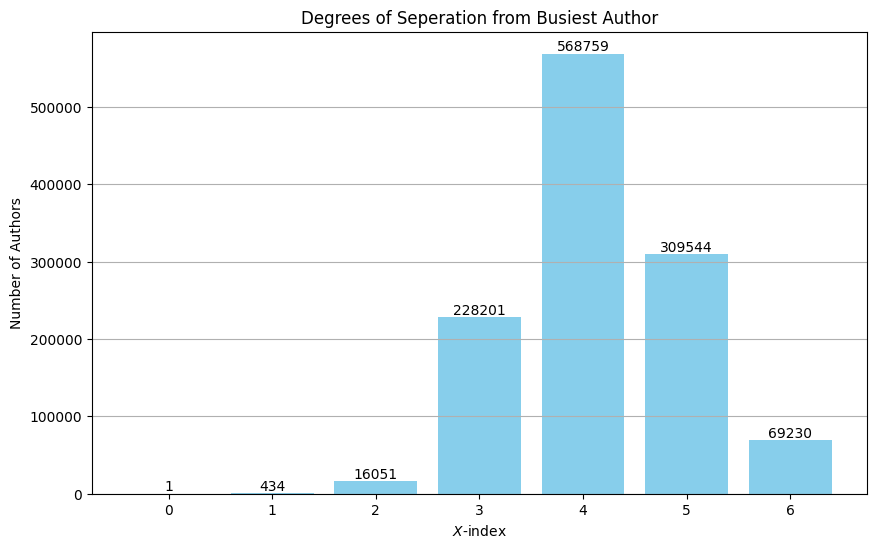

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars = plt.bar(range(0, idx + 1), totals , color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom')
plt.xlabel('$X$-index')
plt.ylabel('Number of Authors')
plt.title('Degrees of Seperation from Busiest Author')
plt.grid(axis='y')
plt.show()

Notice how the number of authors decrease after a certain index point. This makes sense because as we move further away from the most prolific authors, the connections between authors gets more sparse.